<a href="https://colab.research.google.com/github/SmrutiNIT/project/blob/main/DS_Project_6th_April__Clustering(Customer_Personality_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [375]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [430]:
data = pd.read_excel("/content/marketing_campaign.xlsx")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [377]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [378]:
# Imputing missing values with mean
data.loc[(data['Income'].isnull() == True), 'Income'] = data['Income'].mean()   

In [379]:
# Checking the shape of the dataset
data.shape

(2240, 29)

In [380]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [381]:
data.duplicated().sum()

0

In [382]:


data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [383]:
# Finding the basic information regarding dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [384]:

# Finding the number of unique values present in each column

data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [385]:
# Checking if any NaN is present in column or not

data.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [386]:
#Dt_Customer" that indicates the number of days a customer is registered in the firm's database.
## However, in order to keep it simple,  taking this value relative to the most recent customer in the record. 
##Thus to get the values it  must be checked the newest and oldest recorded dates.

In [387]:
# Customer's time being enrolled
data['Dt_Customer'] = pd.to_datetime(data.Dt_Customer)
data['Date_Collected'] = '01-01-2015'
data['Date_Collected'] = pd.to_datetime(data.Date_Collected)
data['Time_Enrolled_Days'] = (data['Date_Collected'] - data['Dt_Customer']).dt.days

In [388]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Date_Collected,Time_Enrolled_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,2015-01-01,849
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,2015-01-01,299
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,2015-01-01,498
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,2015-01-01,325
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,2015-01-01,347


In [389]:
#Now  exploring the unique values in the categorical features to get a clear idea of the data.

In [390]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


**Feature Engineering**

In [391]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2023-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Z_Revenue,Response,Date_Collected,Time_Enrolled_Days,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,11,1,2015-01-01,849,66,1617,Alone,0,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,11,0,2015-01-01,299,69,27,Alone,2,3,1
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,2015-01-01,498,58,776,Partner,0,2,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,11,0,2015-01-01,325,39,53,Partner,1,3,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,2015-01-01,347,42,422,Partner,1,3,1


In [392]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID","Date_Collected"]
data = data.drop(to_drop, axis=1)

In [393]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Time_Enrolled_Days,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,849,66,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,299,69,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,498,58,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,325,39,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,347,42,422,Partner,1,3,1


In [394]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Time_Enrolled_Days,Age,Spent,Children,Family_Size,Is_Parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.064286,0.013393,0.009375,0.149107,539.582143,54.194196,605.798214,0.950446,2.595089,0.715179
std,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.245316,0.114976,0.096391,0.356274,202.122512,11.984069,602.249288,0.751803,0.906959,0.451430
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,186.000000,27.000000,5.000000,0.000000,1.000000,0.000000
25%,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,366.750000,46.000000,68.750000,0.000000,2.000000,0.000000
50%,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,541.500000,53.000000,396.000000,1.000000,3.000000,1.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,715.000000,64.000000,1045.500000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,885.000000,130.000000,2525.000000,3.000000,5.000000,1.000000


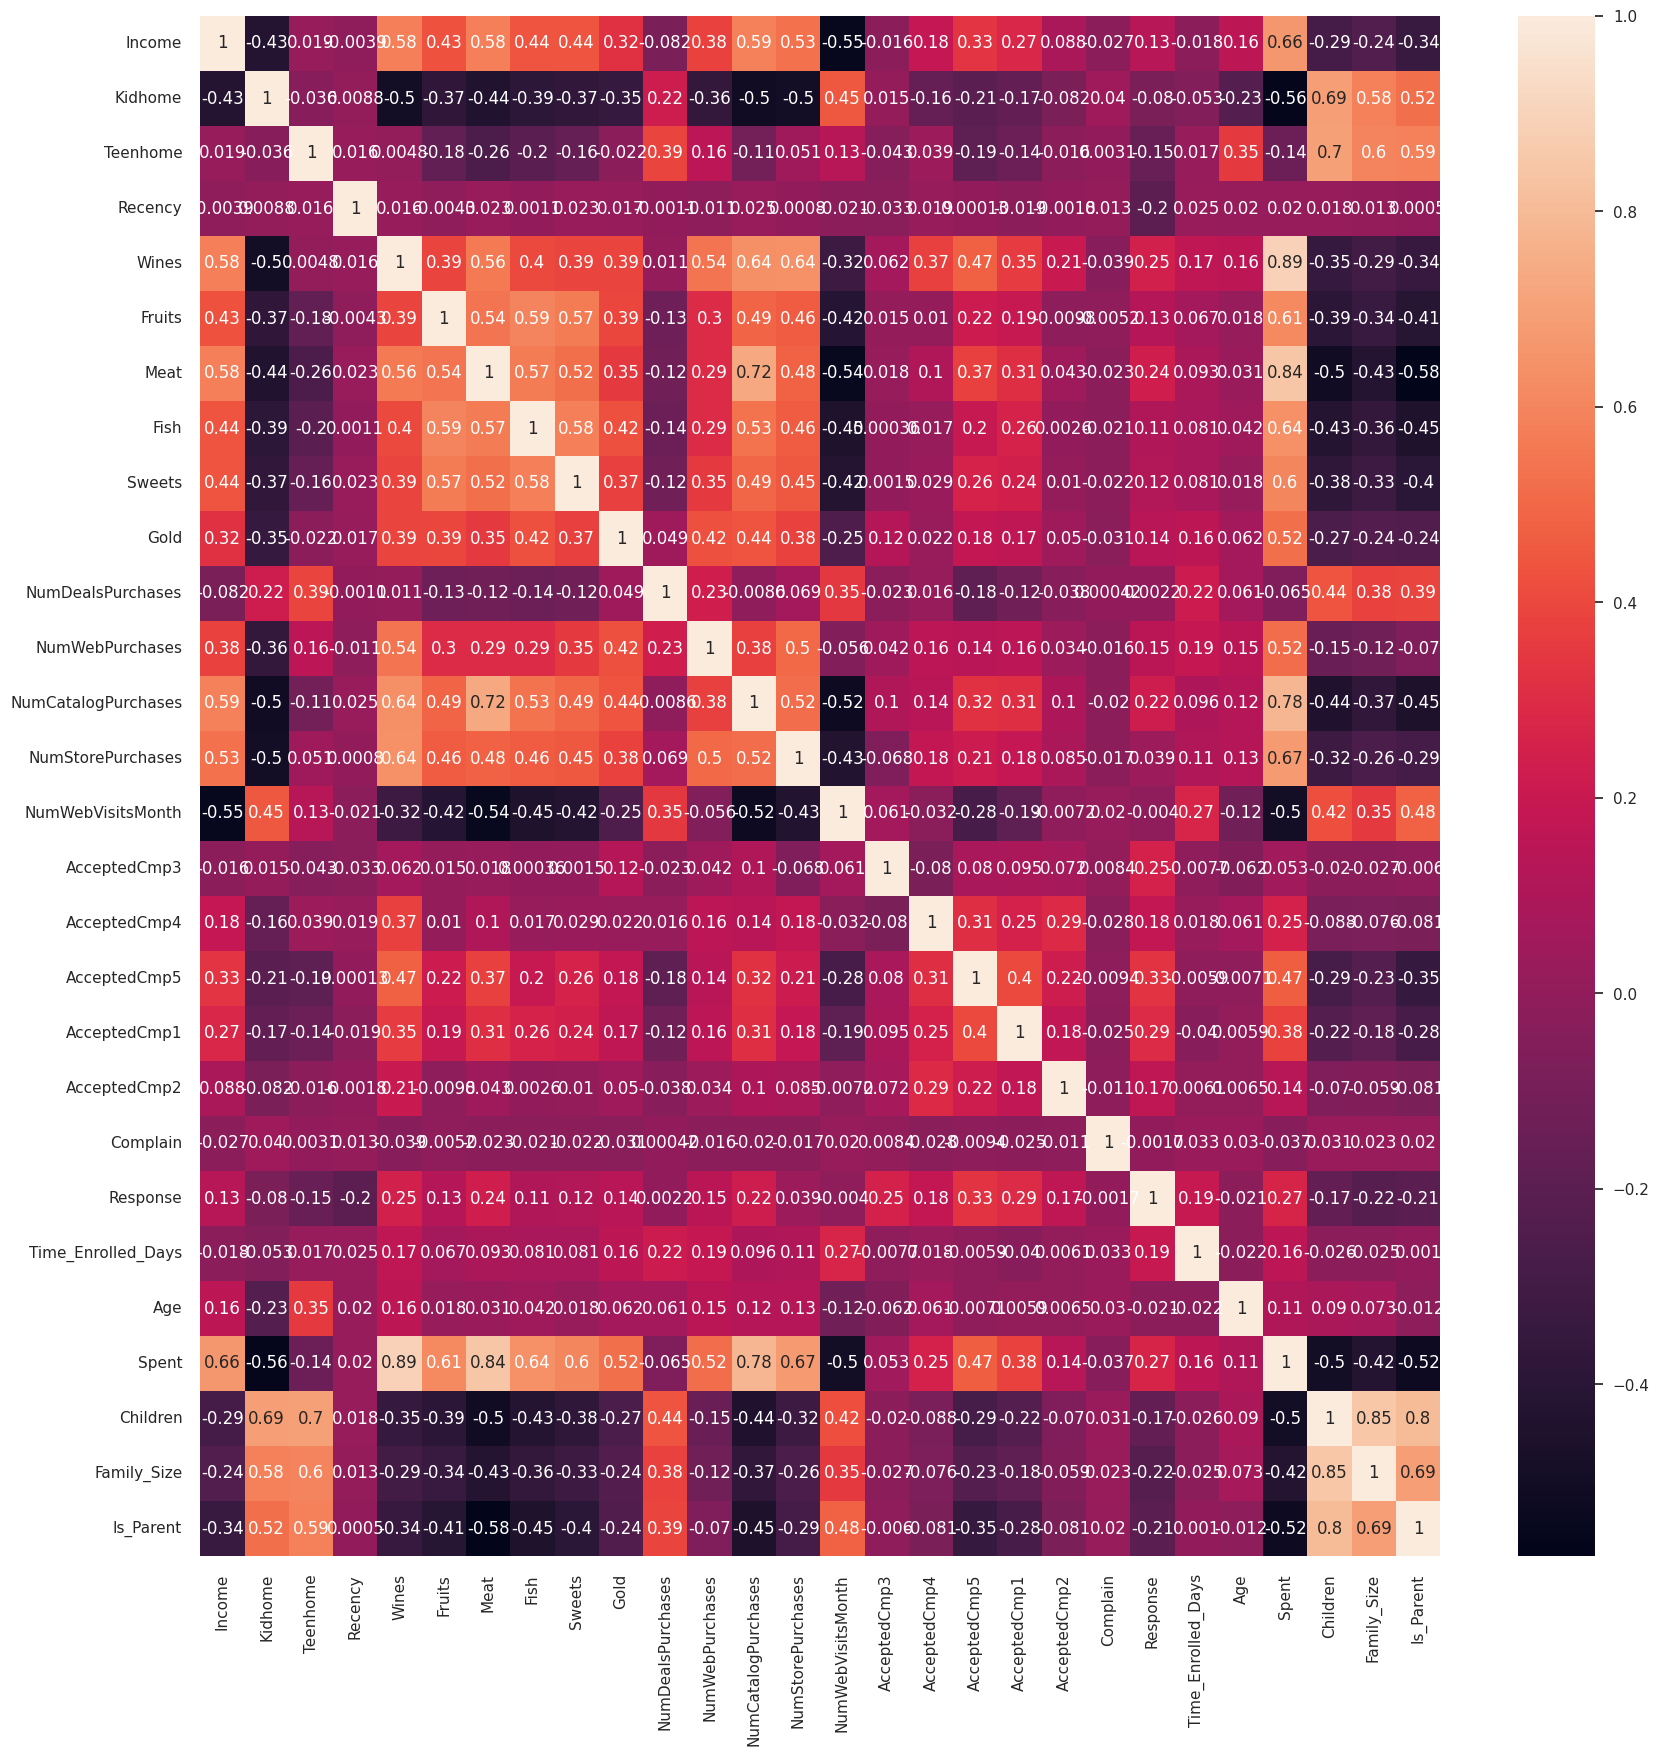

In [395]:
# Finding the correlation between the feature column

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

No two columns are too much correlated with each other. so we can't drop any column on the basis of correlation.

**Data Visualization**

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

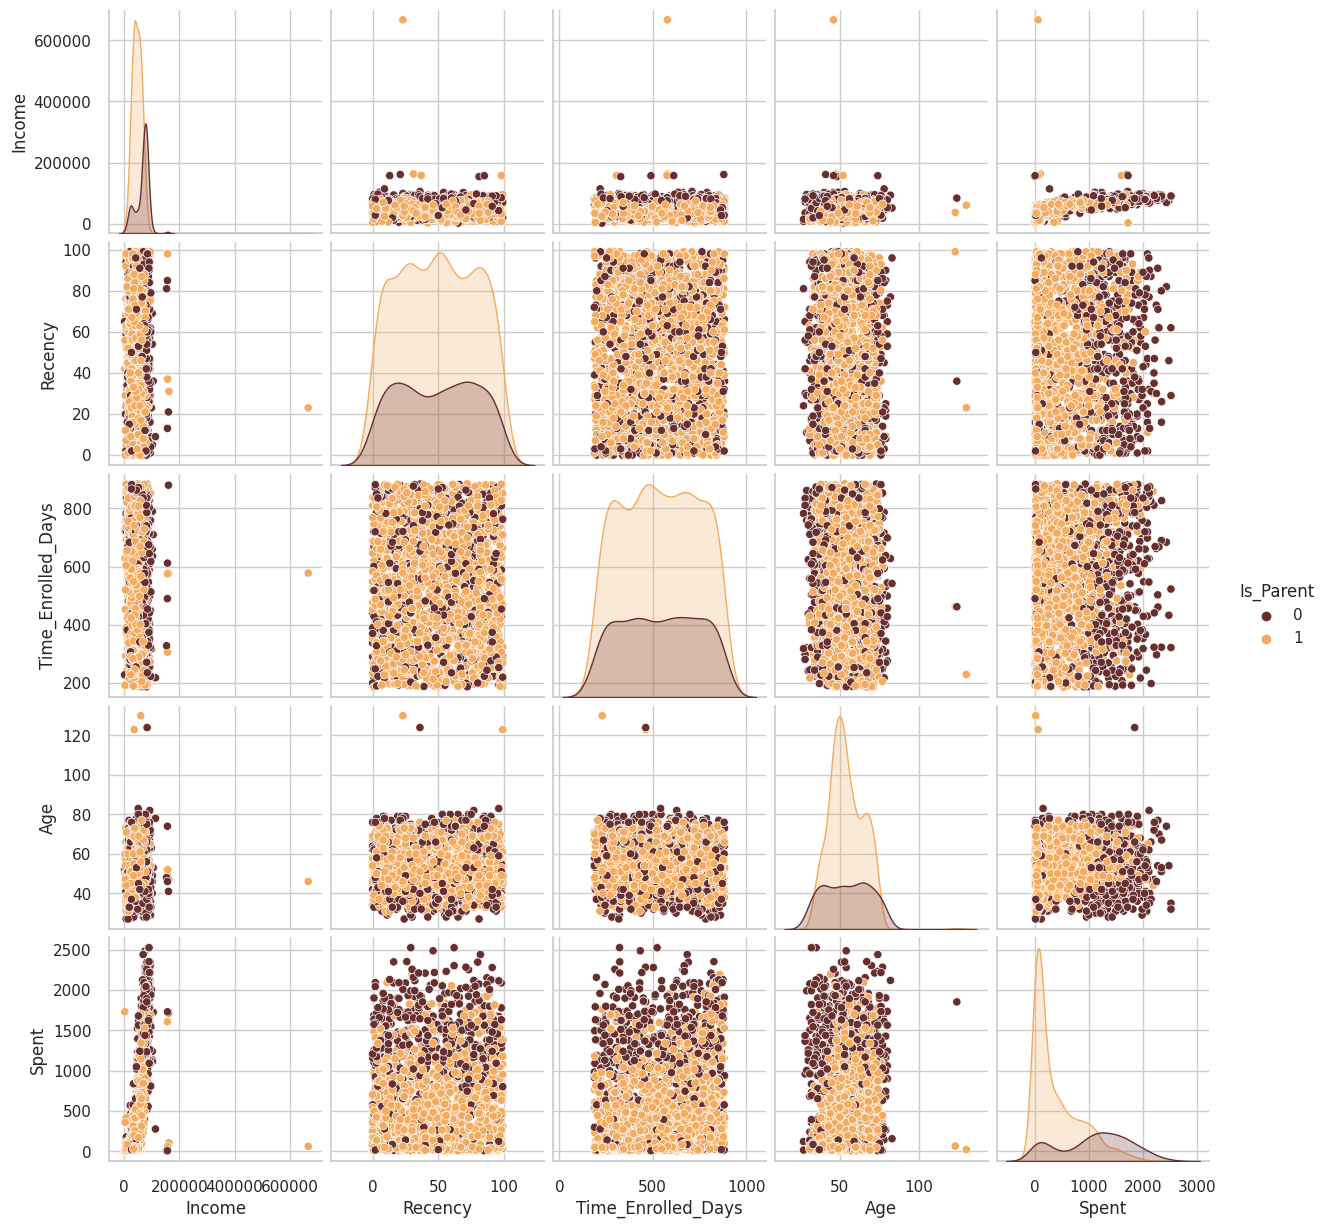

In [396]:
#Plotting following features
To_Plot = [ "Income", "Recency", "Time_Enrolled_Days", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

there are a few outliers in the Income and Age features.So deleting the outliers in the data.

In [397]:
# Removing outliers in income
from scipy import stats

data = data[(np.abs(stats.zscore(data['Income'])) < 3)]     # Remove observation with more than 3 in Standard Desviation
data.reset_index(inplace=True)                          # Reset index
data = data.drop(columns=['index'])

In [398]:
data.shape

(2232, 30)

<Axes: >

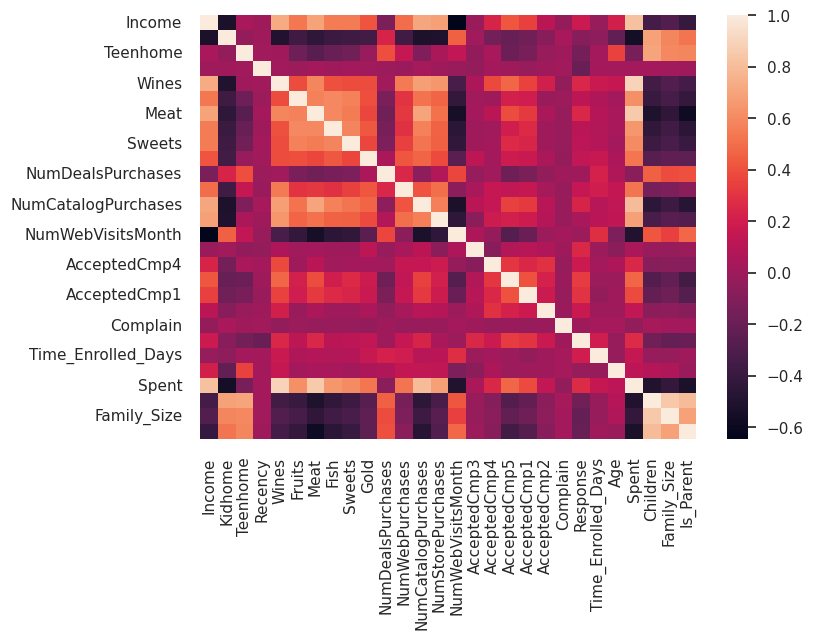

In [399]:
sns.heatmap(data.corr())

Text(0.5, 1.0, 'Income')

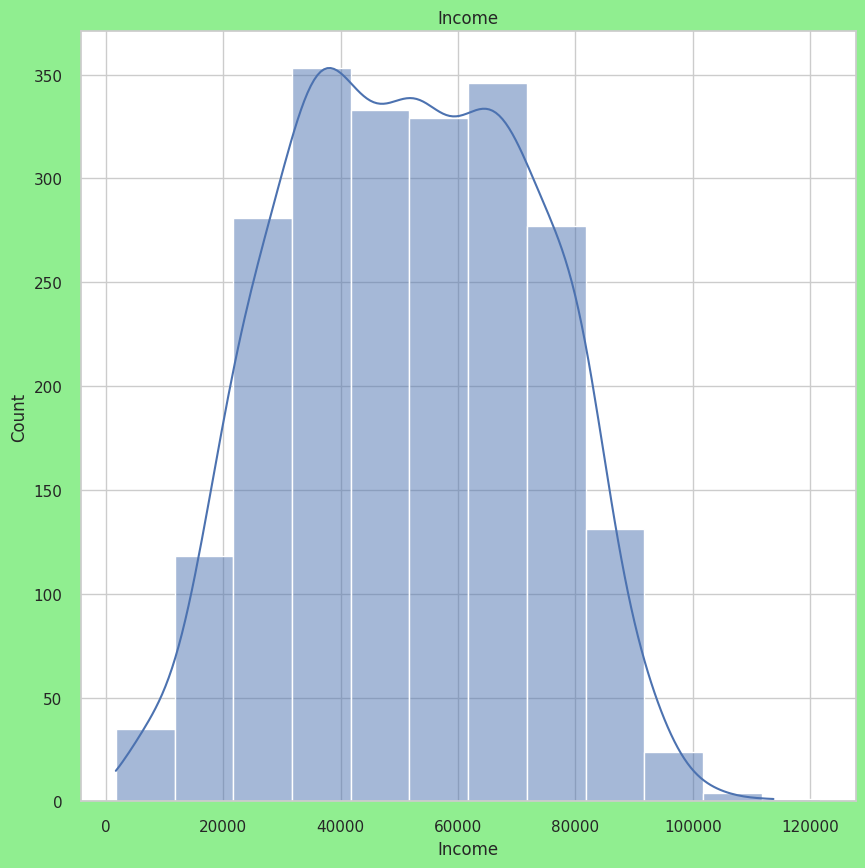

In [400]:

plt.figure(figsize=(10,10), facecolor='lightgreen')
sns.set(style='whitegrid')
ax = sns.histplot(data=data, x='Income', binwidth=10000, kde=True)
ax.set_title('Income')

In [401]:
# The income graph shows that the majority of the clients have incomes between 30,000 to 80,000.

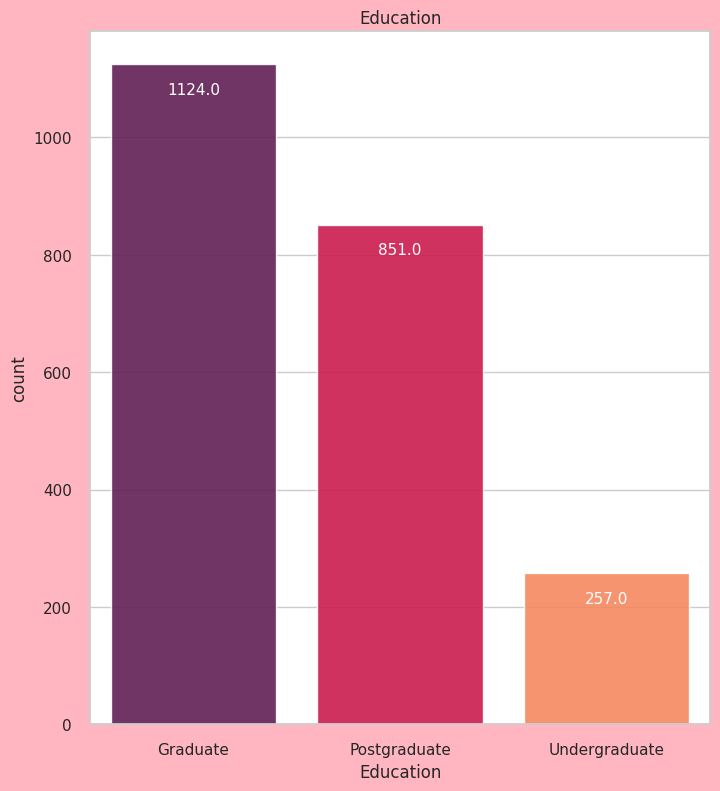

In [402]:
plt.figure(figsize=(8, 9), facecolor='lightpink')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Education', saturation=1, alpha=0.9, palette='rocket', order=data['Education'].value_counts().index)
ax.set_title('Education')
for p in ax.patches:
 ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=11)
plt.show()
     

In [403]:
# The majority of clients are Mater's catagory.

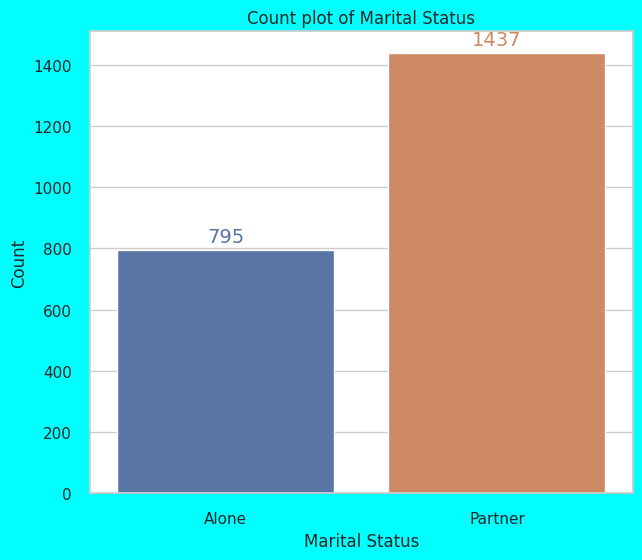

In [404]:
plt.figure(figsize=(7, 6),facecolor='cyan')
ax = sns.countplot(data=data, x='Living_With')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count plot of Marital Status')
plt.show()

The graph shows that majority of the customer are married.

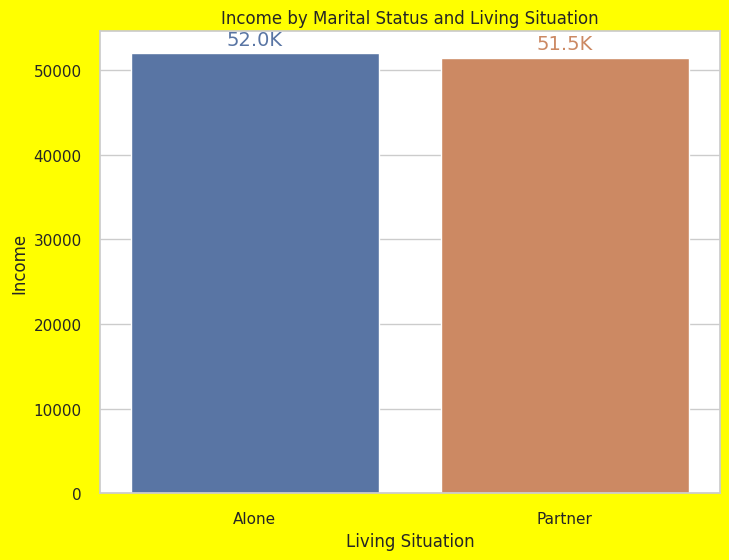

In [405]:
plt.figure(figsize=(8,6),facecolor='Yellow')
ax=sns.barplot(data=data, x='Living_With', y='Income', ci=None)
for p in ax.patches:
    ax.annotate('{:.1f}K'.format(p.get_height()/ 1000), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', xytext = (0, 10), 
            textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.title('Income by Marital Status and Living Situation')
plt.xlabel('Living Situation')
plt.ylabel('Income')
plt.show()

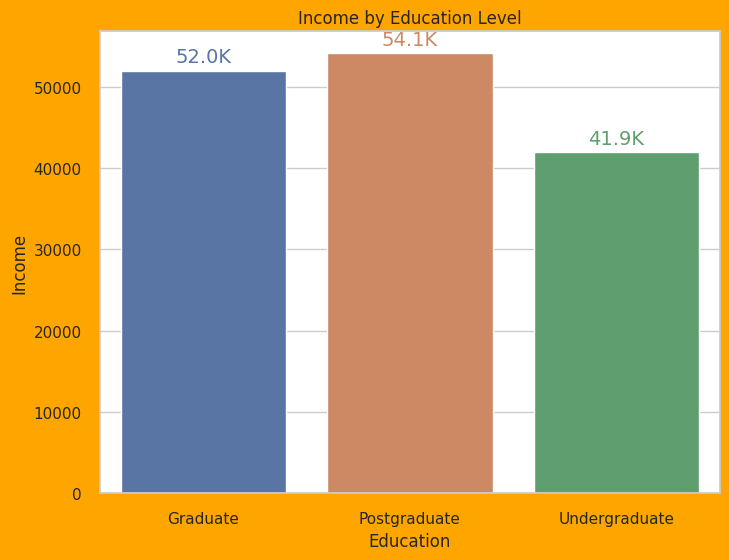

In [406]:
plt.figure(figsize=(8,6),facecolor='Orange')
ax=sns.barplot(data=data, x='Education', y='Income', ci=None)
for p in ax.patches:
    ax.annotate('{:.1f}K'.format(p.get_height()/ 1000), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', xytext = (0, 10), 
            textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.title('Income by Education Level')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

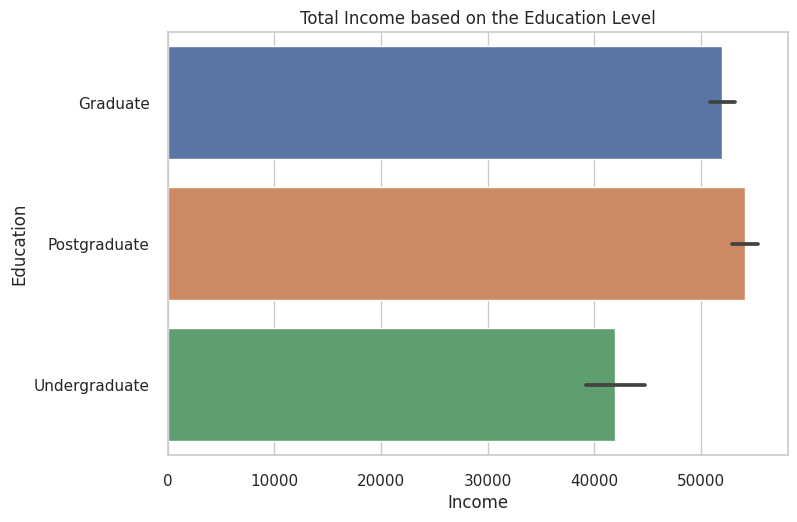

In [407]:

sns.barplot(x = data['Income'],y = data['Education']);
plt.title('Total Income based on the Education Level');

Text(-49, 0, '680816')

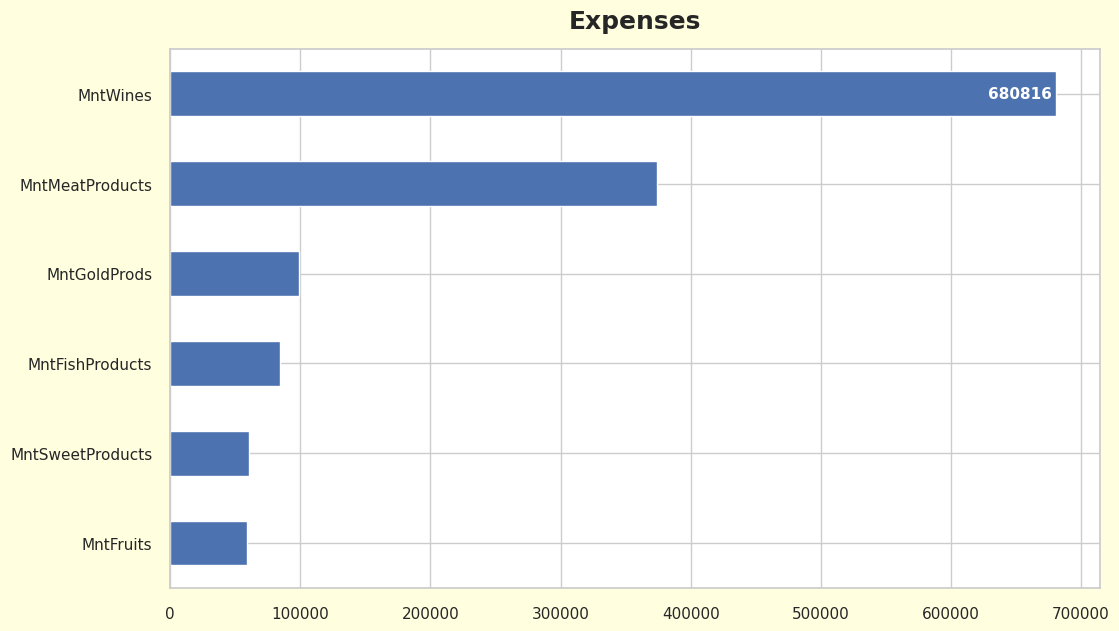

In [431]:
plt.figure(figsize=(12,7), facecolor='lightyellow')
ax = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Expenses', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
 x_value = rect.get_width()
 y_value = rect.get_y() + rect.get_height() / 2
plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-49, 0),
textcoords='offset points', va='center', ha='left', color = 'white', fontsize=11, fontweight='semibold')

Wine has the largest sell amount while Fruits have the least sell amount seen by the graph of total expenses.

**Data preprocessing**

In [408]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [409]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [410]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [411]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Time_Enrolled_Days,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,849,66,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,299,69,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,498,58,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,325,39,53,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,347,42,422,1,1,3,1


In [412]:
data1 = data.copy()

#Scaling
scaler = StandardScaler()
scaler.fit(data1)
scaled_ds = pd.DataFrame(scaler.transform(data1),columns= data1.columns )
print("All features are now scaled")

All features are now scaled


**Standardization**

In [413]:
scaled_features = StandardScaler().fit_transform(data1.values)
scaled_features_data = pd.DataFrame(scaled_features, index=data1.index, columns=data1.columns)

In [414]:
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Time_Enrolled_Days,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.894106,0.315469,-0.825420,-0.931339,0.307081,0.980281,1.547741,1.735476,2.457243,1.472657,...,-0.116722,-0.097458,2.383828,1.530417,0.983726,1.682002,-1.344451,-1.266161,-1.759248,-1.587610
1,-0.894106,-0.257134,1.031775,0.905012,-0.383851,-0.872949,-0.637496,-0.726318,-0.651911,-0.633057,...,-0.116722,-0.097458,-0.419493,-1.189828,1.233983,-0.962227,-1.344451,1.394923,0.446111,0.629878
2,-0.894106,0.969686,-0.825420,-0.931339,-0.798410,0.359568,0.568152,-0.174694,1.341605,-0.148984,...,-0.116722,-0.097458,-0.419493,-0.205594,0.316372,0.283388,0.743798,-1.266161,-0.656569,-1.587610
3,-0.894106,-1.213481,1.031775,-0.931339,-0.798410,-0.872949,-0.562143,-0.662493,-0.505598,-0.584649,...,-0.116722,-0.097458,-0.419493,-1.061234,-1.268592,-0.918988,0.743798,0.064381,0.446111,0.629878
4,0.567905,0.322994,1.031775,-0.931339,1.550759,-0.391822,0.417446,-0.215724,0.152811,-0.003763,...,-0.116722,-0.097458,-0.419493,-0.952424,-1.018334,-0.305328,0.743798,0.064381,0.446111,0.629878


Elbow **method**

In [415]:

from sklearn.cluster import KMeans

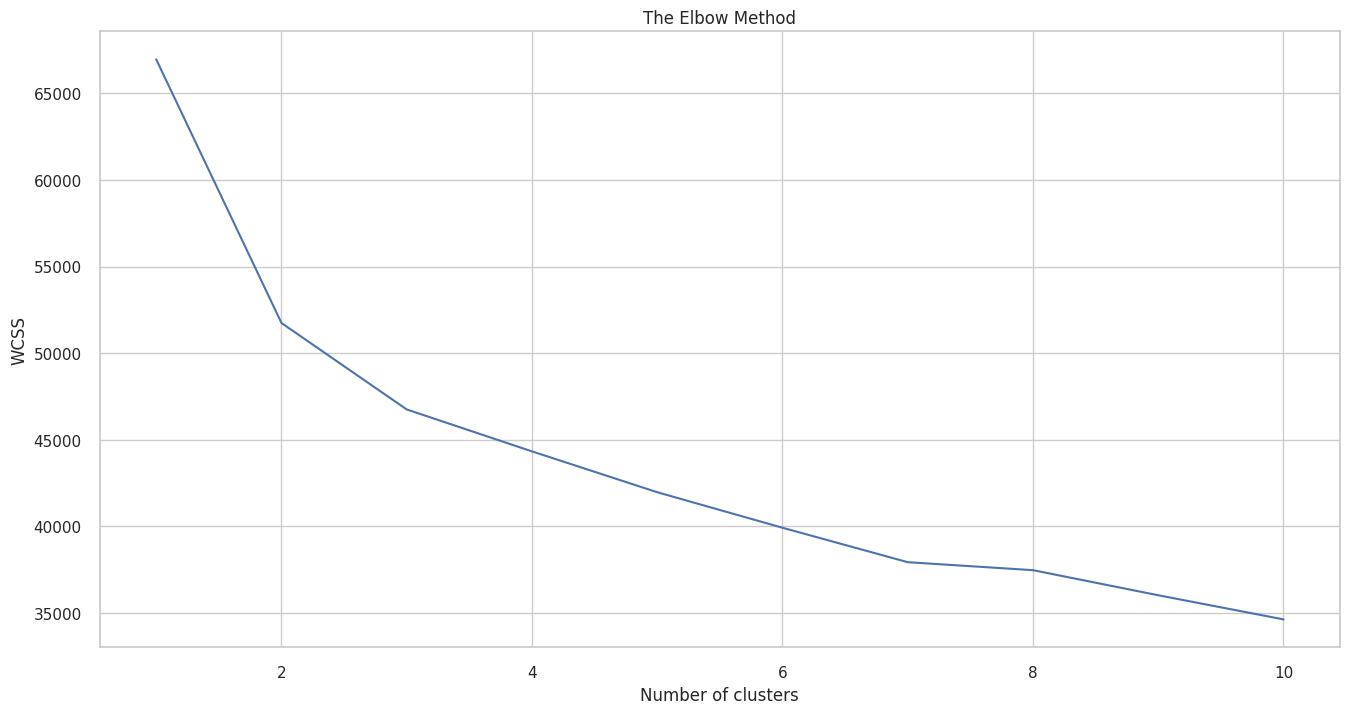

In [429]:

wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(scaled_features_data)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
     

In [417]:
from sklearn.metrics import silhouette_score 
     

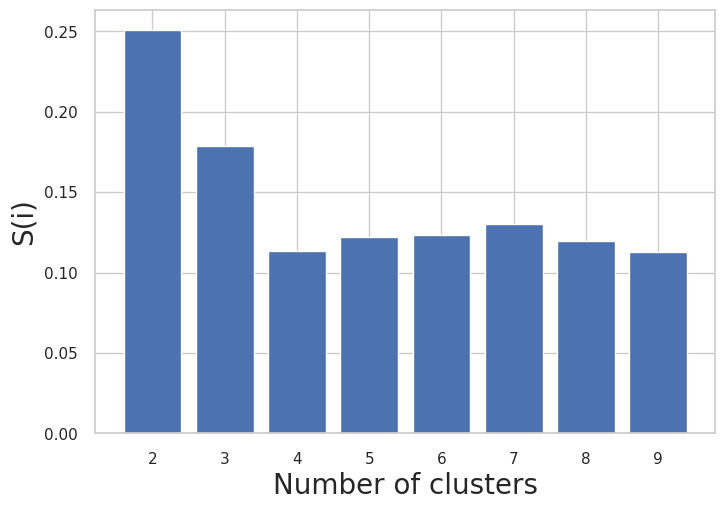

In [418]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_ds)
    silhouette_scores.append(silhouette_score(scaled_ds, m1.fit_predict(scaled_ds))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [419]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=4, random_state=42).fit(scaled_ds)
pred=kmeans.predict(scaled_ds)


# Appending those cluster value into main dataframe (without standard-scalar)

data['cluster'] = pred + 1

In [420]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Time_Enrolled_Days,Age,Spent,Living_With,Children,Family_Size,Is_Parent,cluster
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,1,849,66,1617,0,0,1,0,1
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,299,69,27,0,2,3,1,3
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,498,58,776,1,0,2,0,1
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,325,39,53,1,1,3,1,2
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,347,42,422,1,1,3,1,2


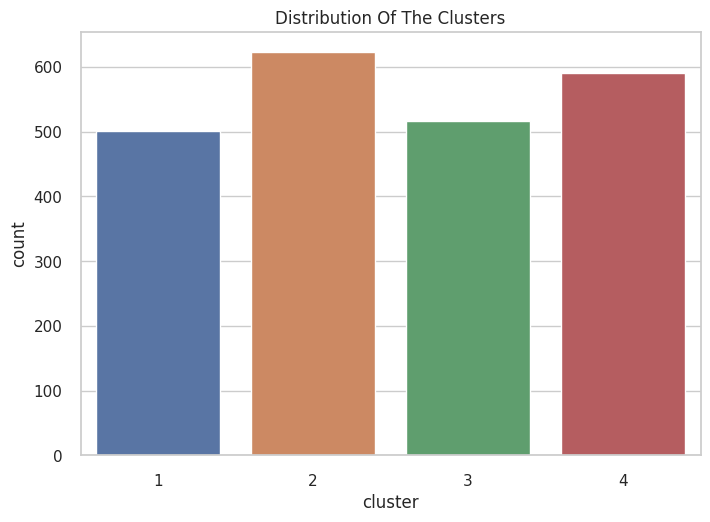

In [421]:
pl = sns.countplot(x=data["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

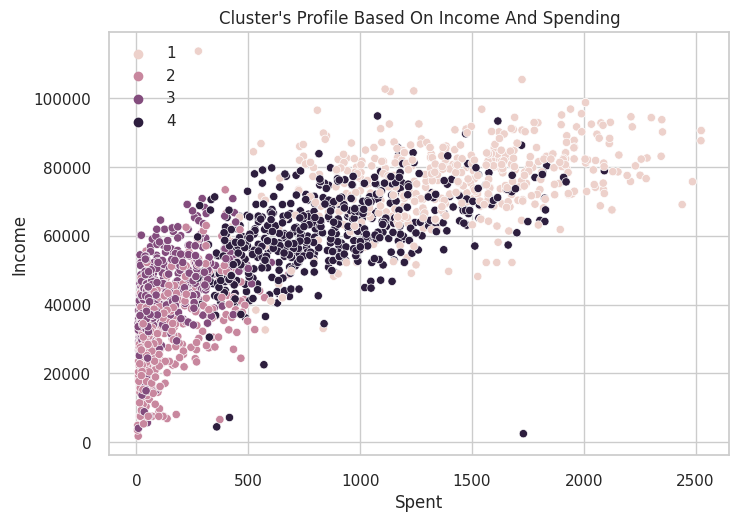

In [422]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["cluster"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Group1-High spending high income

Group2- low spending low income

Group3- High spending low income

Group4- high spending & average income

In [423]:
#looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

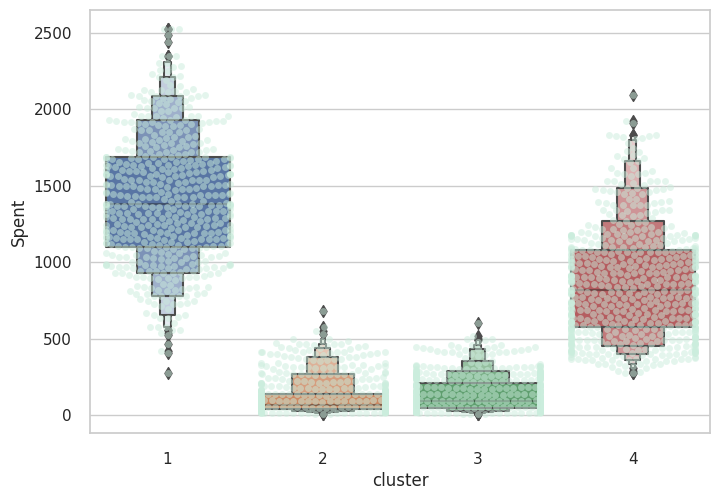

In [424]:
plt.figure()
pl=sns.swarmplot(x=data["cluster"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["cluster"], y=data["Spent"])
plt.show()

In [425]:
#From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 4

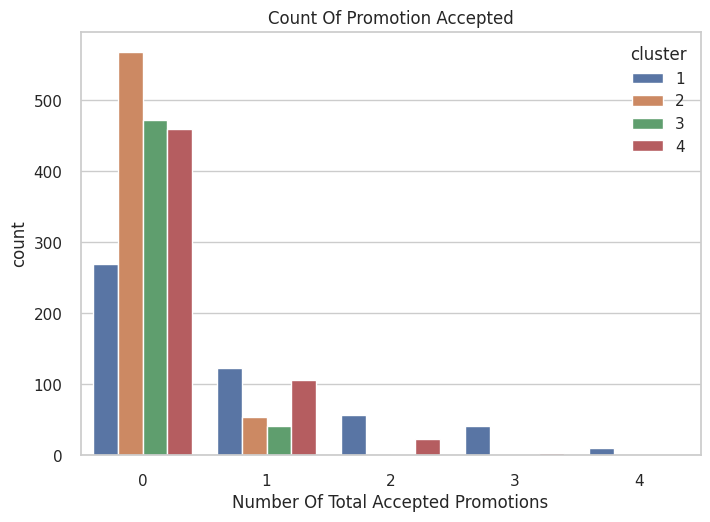

In [426]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["cluster"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

In [427]:
## from the graph it is found that Very few participants  from overall clusters.
# well-planned campaigns are required to boost sales.

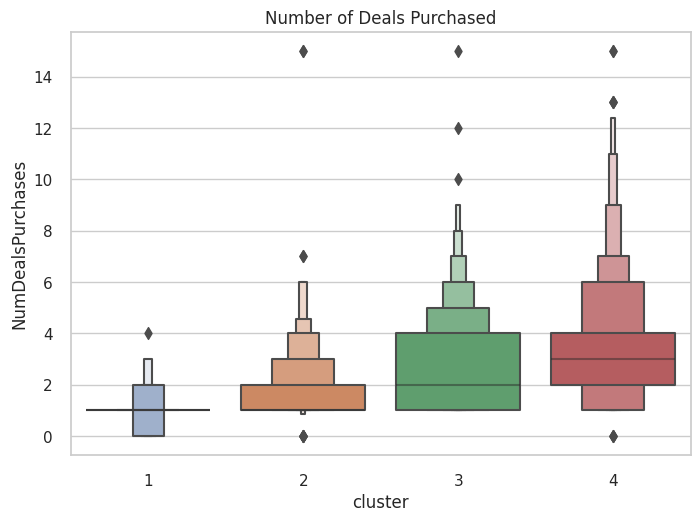

In [428]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["cluster"])
pl.set_title("Number of Deals Purchased")
plt.show()

The deals offered did well.
It has best outcome with cluster 3 and cluster 4.